In [1]:
import json
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set_style('whitegrid')

## 例 2-12 对 Yelp 商家点评数量的 Box-Cox 变换

In [2]:
biz_f = open('data/yelp_dataset/business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()

In [4]:
biz_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [27]:
biz_df['review_count'].describe()

count    192609.000000
mean         33.538962
std         110.135224
min           3.000000
25%           4.000000
50%           9.000000
75%          25.000000
max        8348.000000
Name: review_count, dtype: float64

In [5]:
# Box-Cox transform assumes that input data is positive. 
# Check the min to make sure.
# 接上一个例子，假设biz_df包含Yelp商家点评数据。 
# Box-Cox变换假定输入数据都是正的。 
# 检查数据的最小值以确定满足假定。
biz_df['review_count'].min()

3

In [14]:
# Setting input parameter lmbda to 0 gives us the log transform (without constant offset)
# 设置输入参数 λ 为0，使用对数变换（没有固定长度的位移）。
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
# By default, the scipy implementation of Box-Cox transform finds the lmbda parameter
# that will make the output the closest to a normal distribution
# 默认情况下，SciPy在实现Box-Cox转换时，会找出使得输出最接近于正态分布的 λ 参数。
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.37107910850437914

In [15]:
rc_bc

array([1.21177768, 2.2496055 , 2.29410519, ..., 1.68272942, 1.70831248,
       0.90224163])

In [16]:
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

## 例2-13 初始、对数变换后和 Box-Cox 变换后的点评数量直方图可视化

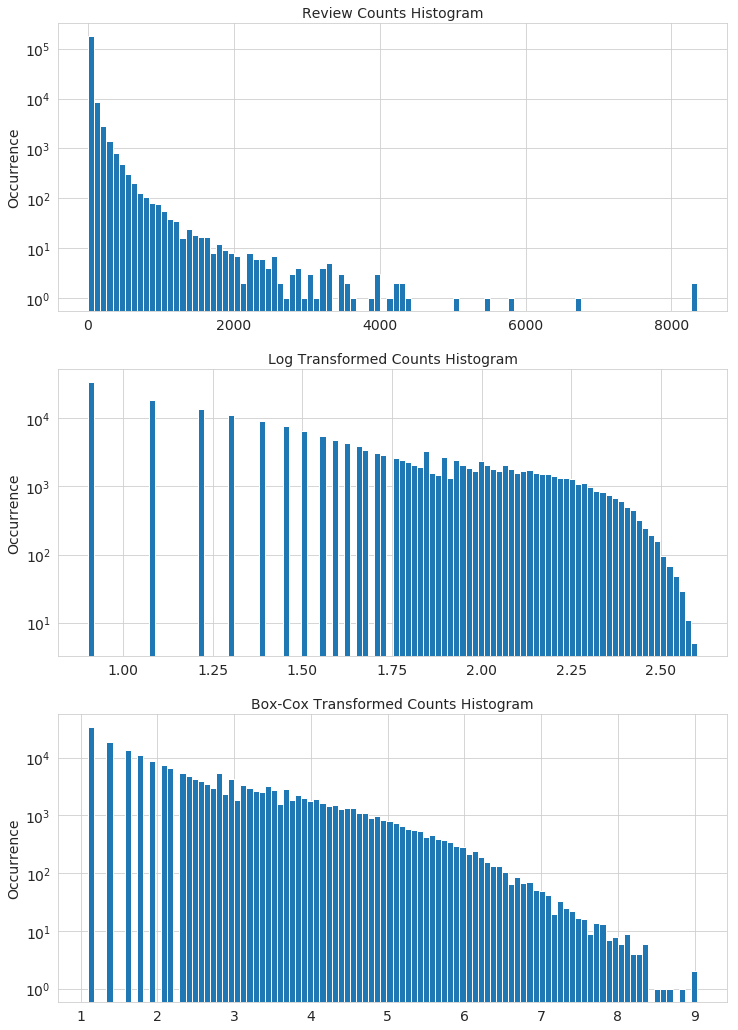

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
# original review count histogram
# 初始点评数量直方图
biz_df['review_count'].hist(ax=ax1, bins=100, figsize=(12, 18))
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
# ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)
# review count after log transform
# 对数变换后的点评数量
biz_df['rc_bc'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
# ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)# review count after optimal Box-Cox transform
# 最优Box-Cox变换后的点评数量
biz_df['rc_log'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
# ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)
fig.savefig('box-cox-hist.svg')

## 例 2-14 初始和变换后点评数量的概率图，并和正态分布进行对比

图 2-14：原始点评数量及变换后点评数量的分布与正态分布的对比


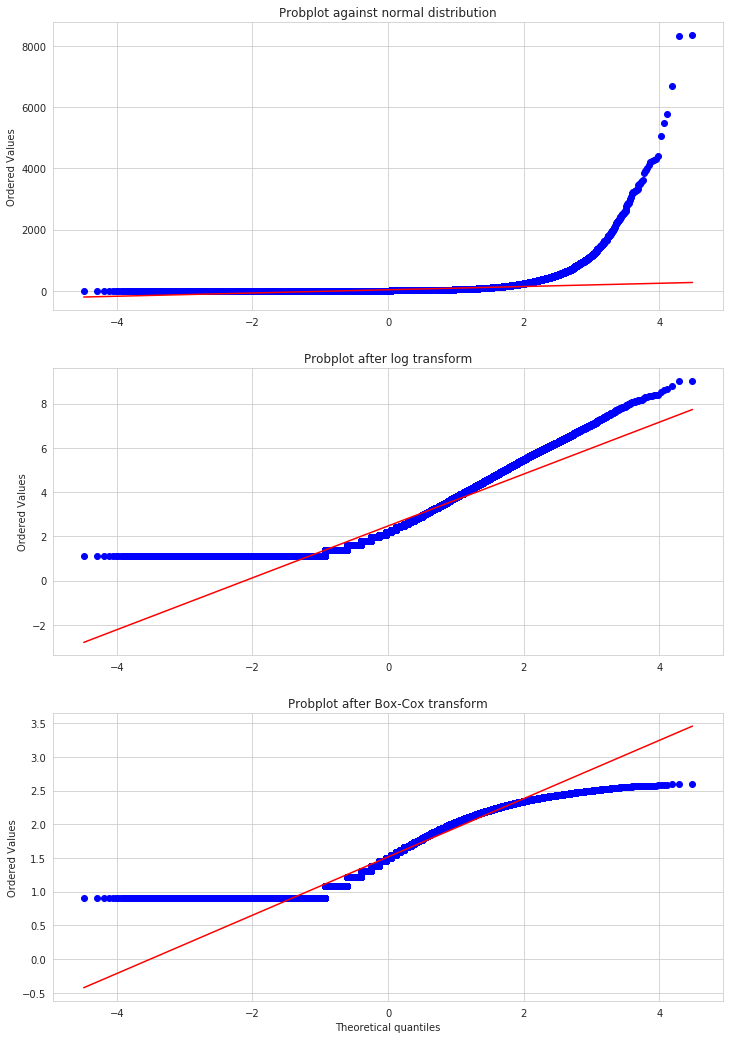

In [41]:
fig2, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(12,18))
prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')
prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')
print('图 2-14：原始点评数量及变换后点评数量的分布与正态分布的对比')

In [36]:
fig2.savefig('box-cox-probplot.png')